Enter the elements of the list to be sorted9 2 6 4 10 80 3 1
Sorted List : [1, 2, 3, 4, 6, 9, 10, 80]


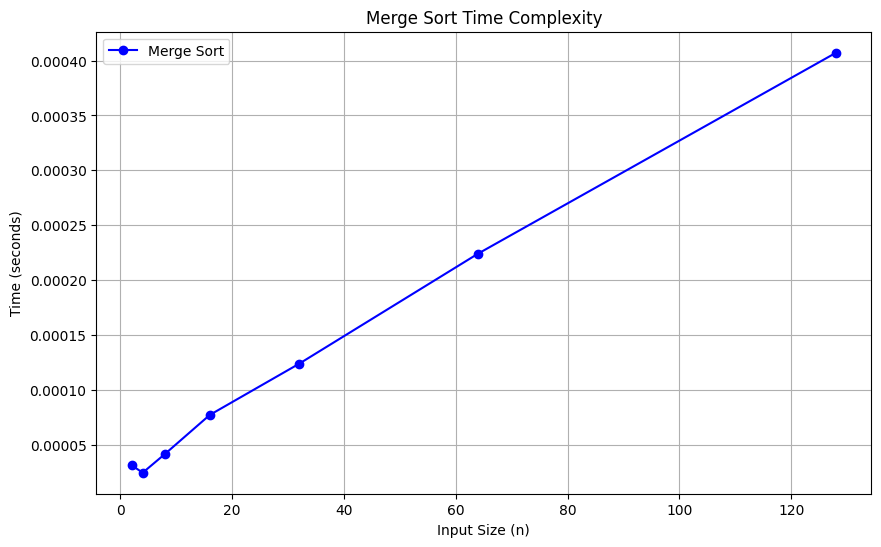

In [5]:
#task1.1

import time
import matplotlib.pyplot as plt
import numpy as np

def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left_half = merge_sort(arr[:mid])
    right_half = merge_sort(arr[mid:])
    return merge(left_half, right_half)

def merge(left, right):
    sorted_list = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            sorted_list.append(left[i])
            i += 1
        else:
            sorted_list.append(right[j])
            j += 1
    sorted_list.extend(left[i:])
    sorted_list.extend(right[j:])
    return sorted_list

l=list(map(int,input("Enter the elements of the list to be sorted : ").split()))
print("Sorted List :", merge_sort(l),end="\n")

def measure_merge_sort_time(n):
    arr = np.random.randint(1, 10000, size=n)
    start_time = time.time()
    merge_sort(arr)
    end_time = time.time()
    return end_time - start_time

input_sizes = [2,4,8,16,32,64,128]
merge_sort_times = []

for size in input_sizes:
    merge_sort_times.append(measure_merge_sort_time(size))

plt.figure(figsize=(10, 6))
plt.plot(input_sizes, merge_sort_times, label="Merge Sort", color='blue', marker='o')
plt.xlabel('Input Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Merge Sort Time Complexity')
plt.legend()
plt.grid(True)
plt.show()


Enter the elements of the list to be sorted : 800 6 9 26 18 31 23 10000 1 2 7 27 0
Sorted List : [0, 1, 2, 6, 7, 9, 18, 23, 26, 27, 31, 800, 10000]


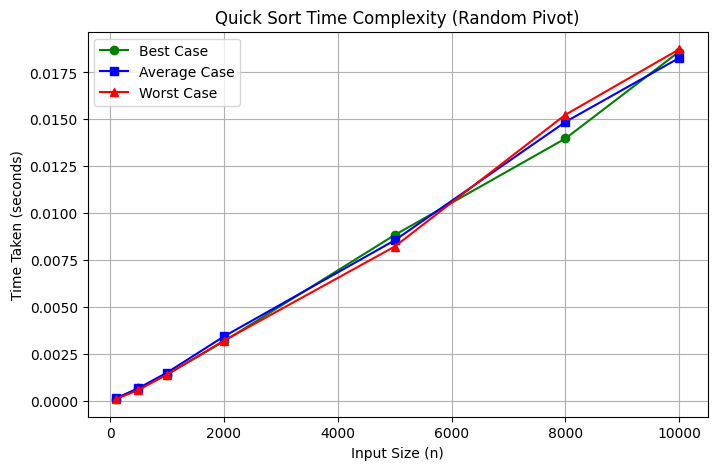

In [6]:
#task 1.2
import random
import time
import matplotlib.pyplot as plt
import sys

sys.setrecursionlimit(20000)  # increase recursion limit for large arrays

def partition(arr, low, high):
    pivot_index = random.randint(low, high)  # random pivot
    arr[pivot_index], arr[high] = arr[high], arr[pivot_index]
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quick_sort(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)
        quick_sort(arr, low, pi - 1)
        quick_sort(arr, pi + 1, high)

l=list(map(int,input("Enter the elements of the list to be sorted : ").split()))
print("Sorted List :", merge_sort(l),end="\n")

def measure_time(arr):
    start = time.time()
    quick_sort(arr, 0, len(arr) - 1)
    end = time.time()
    return end - start

sizes = [100, 500, 1000, 2000, 5000, 8000, 10000]
best_times = []
avg_times = []
worst_times = []

for n in sizes:
    arr_best = list(range(n))
    best_times.append(measure_time(arr_best.copy()))

    arr_avg = [random.randint(0, 100000) for _ in range(n)]
    avg_times.append(measure_time(arr_avg.copy()))

    arr_worst = list(range(n, 0, -1))
    worst_times.append(measure_time(arr_worst.copy()))

plt.figure(figsize=(8,5))
plt.plot(sizes, best_times, marker='o', color='green', label='Best Case')
plt.plot(sizes, avg_times, marker='s', color='blue', label='Average Case')
plt.plot(sizes, worst_times, marker='^', color='red', label='Worst Case')

plt.title('Quick Sort Time Complexity (Random Pivot)')
plt.xlabel('Input Size (n)')
plt.ylabel('Time Taken (seconds)')
plt.grid(True)
plt.legend()
plt.show()

In [7]:
#task 2
from collections import defaultdict

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = defaultdict(list)
        self.timer = 0
        self.dfn = [0] * (self.V + 1)
        self.low = [0] * (self.V + 1)
        self.visited = [False] * (self.V + 1)
        self.ap = set()
    def add_edge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)
    def dfs(self, u, parent):
        self.visited[u] = True
        self.timer += 1
        self.dfn[u] = self.low[u] = self.timer
        child_count = 0
        for v in self.graph[u]:
            if v == parent:
                continue
            if not self.visited[v]:
                self.dfs(v, u)
                self.low[u] = min(self.low[u], self.low[v])
                if parent != -1 and self.low[v] >= self.dfn[u]:
                    self.ap.add(u)
                child_count += 1
            else:
                self.low[u] = min(self.low[u], self.dfn[v])
        if parent == -1 and child_count > 1:
            self.ap.add(u)
    def find_articulation_points(self):
        for i in range(1, self.V + 1):
            if not self.visited[i]:
                self.dfs(i, -1)
        return sorted(list(self.ap))
V = int(input("Enter number of vertices: "))
E = int(input("Enter number of edges: "))

g = Graph(V)
print("Enter each edge (u v):")
for _ in range(E):
    u, v = map(int, input().split())
    g.add_edge(u, v)
articulation_points = g.find_articulation_points()

print("\nArticulation Points:", articulation_points if articulation_points else "None")

Enter number of vertices: 3
Enter number of edges: 2
Enter each edge (u v):
1 2
2 3

Articulation Points: [2]


In [8]:
#task 3
n = int(input("Enter number of jobs: "))
profits = list(map(int, input("Enter profits (space-separated): ").split()))
deadlines = list(map(int, input("Enter deadlines (space-separated): ").split()))

jobs = [(i + 1, profits[i], deadlines[i]) for i in range(n)]
jobs.sort(key=lambda x: x[1], reverse=True)

J = [0]
J.append(jobs[0][0])
k = 1

for i in range(1, n):
    r = k
    while r > 0 and deadlines[J[r] - 1] > jobs[i][2]:
        r -= 1
    if (r == 0 or deadlines[J[r] - 1] <= jobs[i][2]) and jobs[i][2] > r:
        J = J[:r + 1] + [jobs[i][0]] + J[r + 1:]
        k += 1

scheduled_jobs = J[1:]
total_profit = sum(profits[j - 1] for j in scheduled_jobs)

print("\nJobs scheduled:", scheduled_jobs)
print("Total profit:", total_profit)

Enter number of jobs: 4
Enter profits (space-separated): 2 5 2 4
Enter deadlines (space-separated): 3 2 1 1

Jobs scheduled: [4, 2, 1]
Total profit: 11


In [9]:
#task 4
# Fractional Knapsack with dynamic input

n = int(input("Enter number of items: "))
m = int(input("Enter knapsack capacity: "))

profits = list(map(int, input("Enter profits (space-separated): ").split()))
weights = list(map(int, input("Enter weights (space-separated): ").split()))

items = [(i, profits[i], weights[i], profits[i] / weights[i]) for i in range(n)]
items.sort(key=lambda x: x[3], reverse=True)

fractions = [0] * n
capacity = m
total_profit = 0

for i, p, w, ratio in items:
    if w <= capacity:
        fractions[i] = 1
        total_profit += p
        capacity -= w
    else:
        fractions[i] = capacity / w
        total_profit += p * fractions[i]
        break

print("Fractions:", fractions)
print("Maximum Profit:", total_profit)

Enter number of items: 5
Enter knapsack capacity: 18
Enter profits (space-separated): 2 4 5 2 1
Enter weights (space-separated): 3 5 5 6 2
Fractions: [1, 1, 1, 0.5, 1]
Maximum Profit: 13.0


In [11]:
#task 5
import heapq

def dijkstra(cost, src):
    n = len(cost)
    dist = [float('inf')] * n
    parent = [-1] * n
    dist[src] = 0

    pq = [(0, src)]

    while pq:
        d, u = heapq.heappop(pq)
        if d > dist[u]:
            continue
        for v in range(n):
            if cost[u][v] > 0:
                if dist[v] > dist[u] + cost[u][v]:
                    dist[v] = dist[u] + cost[u][v]
                    parent[v] = u
                    heapq.heappush(pq, (dist[v], v))

    return dist, parent

def get_path(parent, v):
    path = []
    while v != -1:
        path.append(v+1)
        v = parent[v]
    return path[::-1]

n = int(input("Enter number of vertices: "))

print("Enter the cost matrix (row by row):")
cost_matrix = []
for i in range(n):
    row = list(map(int, input().split()))
    cost_matrix.append(row)

source = int(input("Enter source vertex (1-based): ")) - 1

dist, parent = dijkstra(cost_matrix, source)

print("\nVertex\tDistance\tPath")
for v in range(n):
    if dist[v] == float('inf'):
        print(f"{v+1}\tINF\t\tNo path")
    else:
        path = " -> ".join(map(str, get_path(parent, v)))
        print(f"{v+1}\t{dist[v]}\t\t{path}")

Enter number of vertices: 6
Enter the cost matrix (row by row):
0 50 45 10 0 0
0 0 25 20 0 0
0 0 0 0 0 0
10 0 0 0 15 0
0 20 35 0 0 0
0 0 0 0 10 0
Enter source vertex (1-based): 1

Vertex	Distance	Path
1	0		1
2	45		1 -> 4 -> 5 -> 2
3	45		1 -> 3
4	10		1 -> 4
5	25		1 -> 4 -> 5
6	INF		No path


In [14]:
#obst
def find(c,r,i,j):
    min_val=float('inf')
    min_k=-1
    for k in range(r[i][j-1],r[i+1][j]+1):
        if c[i][k-1]+c[k][j]<min_val:
            min_val=c[i][k-1]+c[k][j]
            min_k=k
    return min_k

def obst(p,q,n):
    w=[[0.0]*(n+1) for _ in range(n+1)]
    c=[[0.0]*(n+1) for _ in range(n+1)]
    r=[[0]*(n+1) for _ in range(n+1)]
    for i in range(n+1):
        w[i][i]=q[i]
        c[i][i]=0
        r[i][i]=0
        if i!=n:
            w[i][i+1]=q[i]+q[i+1]+p[i]
            c[i][i+1]=w[i][i+1]
            r[i][i+1]=i+1
    for m in range(2,n+1):
        for i in range(n-m+1):
            j=i+m
            w[i][j]=w[i][j-1]+p[j-1]+q[j]
            k=find(c,r,i,j)
            c[i][j]=w[i][j]+c[i][k-1]+c[k][j]
            r[i][j]=k
    return w,c,r

def print_tree(r,i,j,level=0):
    root=r[i][j]
    if root==0: return
    print("   "*level+f"Key {root}")
    print_tree(r,i,root-1,level+1)
    print_tree(r,root,j,level+1)

n=int(input("Enter number of keys: "))
p=list(map(float,input("Enter successful probabilities p: ").split()))
q=list(map(float,input("Enter unsuccessful probabilities q: ").split()))
w,c,r=obst(p,q,n)
print("\nWeight Matrix (W):")
for row in w:
    print(['{:.2f}'.format(x) for x in row])
print("\nCost Matrix (C):")
for row in c:
    print(['{:.2f}'.format(x) for x in row])
print("\nRoot Matrix (R):")
for row in r:
    print(row)
print("\nOptimal Binary Search Tree:")
print_tree(r,0,n)


Enter number of keys: 4
Enter successful probabilities p: 3 3 1 1
Enter unsuccessful probabilities q: 2 3 1 1 1

Weight Matrix (W):
['2.00', '8.00', '12.00', '14.00', '16.00']
['0.00', '3.00', '7.00', '9.00', '11.00']
['0.00', '0.00', '1.00', '3.00', '5.00']
['0.00', '0.00', '0.00', '1.00', '3.00']
['0.00', '0.00', '0.00', '0.00', '1.00']

Cost Matrix (C):
['0.00', '8.00', '19.00', '25.00', '32.00']
['0.00', '0.00', '7.00', '12.00', '19.00']
['0.00', '0.00', '0.00', '3.00', '8.00']
['0.00', '0.00', '0.00', '0.00', '3.00']
['0.00', '0.00', '0.00', '0.00', '0.00']

Root Matrix (R):
[0, 1, 1, 2, 2]
[0, 0, 2, 2, 2]
[0, 0, 0, 3, 3]
[0, 0, 0, 0, 4]
[0, 0, 0, 0, 0]

Optimal Binary Search Tree:
Key 2
   Key 1
   Key 3
      Key 4


In [16]:
#task 8
import sys

def prims_algorithm(cost, n):
    # Array to track visited vertices
    visited = [False] * n

    # Start from vertex 0
    visited[0] = True

    edges = []
    total_cost = 0

    # MST will have (n-1) edges
    for _ in range(n - 1):
        min_cost = sys.maxsize
        u, v = -1, -1

        # Pick minimum cost edge from visited → unvisited
        for i in range(n):
            if visited[i]:
                for j in range(n):
                    if not visited[j] and cost[i][j] < min_cost:
                        min_cost = cost[i][j]
                        u, v = i, j

        visited[v] = True
        edges.append((u, v, min_cost))
        total_cost += min_cost

    return edges, total_cost
n = int(input("Enter number of vertices: "))
print("Enter cost adjacency matrix (use 999999 or a very large number for infinity):")
cost = []
for i in range(n):
  row = list(map(int, input().split()))
  cost.append(row)

edges, total_cost = prims_algorithm(cost, n)
print("\nEdges in MST:")
for u, v, w in edges:
  print(f"{u} -- {v}  cost = {w}")
print("Total cost of MST =", total_cost)

Enter number of vertices: 7
Enter cost adjacency matrix (use 999999 or a very large number for infinity):
999999 28 999999 999999 999999 10 999999
28 999999 16 999999 999999 999999 14
999999 16 999999 12 999999 999999 999999
999999 999999 12 999999 22 999999 18
999999 999999 999999 22 999999 25 24
10 999999 999999 999999 25 999999 999999
999999 14 999999 18 24 999999 999999

Edges in MST:
0 -- 5  cost = 10
5 -- 4  cost = 25
4 -- 3  cost = 22
3 -- 2  cost = 12
2 -- 1  cost = 16
1 -- 6  cost = 14
Total cost of MST = 99


In [17]:
#task 9
class Graph:
    def __init__(self, size):
        self.size = size
        self.edges = []  # (u, v, weight)

    def add_edge(self, u, v, weight):
        if 0 <= u < self.size and 0 <= v < self.size:
            self.edges.append((u, v, weight))
        else:
            print(f"Invalid edge: vertices {u} or {v} out of range.")

    def find(self, parent, i):
        if parent[i] == i:
            return i
        parent[i] = self.find(parent, parent[i])  # path compression
        return parent[i]

    def union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)
        if xroot != yroot:
            if rank[xroot] < rank[yroot]:
                parent[xroot] = yroot
            elif rank[xroot] > rank[yroot]:
                parent[yroot] = xroot
            else:
                parent[yroot] = xroot
                rank[xroot] += 1
            return True
        return False

    def kruskals_algorithm(self):
        mst = []
        total_cost = 0

        self.edges.sort(key=lambda x: x[2])
        parent = [i for i in range(self.size)]
        rank = [0] * self.size

        for u, v, w in self.edges:
            if self.union(parent, rank, u, v):
                mst.append((u, v, w))
                total_cost += w

        print("\nEdges in MST:")
        for u, v, w in mst:
            print(f"{u} - {v}  Weight: {w}")

        print(f"\nTotal cost of MST: {total_cost}")


def main():
    V = int(input("Enter number of vertices: "))
    E = int(input("Enter number of edges: "))
    g = Graph(V)

    print(f"Enter edges in the format: u v weight (where vertices are 0 to {V-1})")

    for _ in range(E):
        while True:
            edge_input = input("Edge: ").strip().split()
            if len(edge_input) != 3:
                print("Invalid input. Please enter exactly two vertices and weight.")
                continue
            u, v, w = edge_input
            try:
                u = int(u)
                v = int(v)
                w = int(w)
                break
            except ValueError:
                print("Vertices and weight must be integers.")
        g.add_edge(u, v, w)

    g.kruskals_algorithm()

main()

Enter number of vertices: 4
Enter number of edges: 5
Enter edges in the format: u v weight (where vertices are 0 to 3)
Edge: 0 1 10
Edge: 0 2 6
Edge: 0 3 5
Edge: 1 3 15
Edge: 2 3 4

Edges in MST:
2 - 3  Weight: 4
0 - 3  Weight: 5
0 - 1  Weight: 10

Total cost of MST: 19


In [18]:
#task 10
def is_safe(graph, color, vertex, c):
    for i in range(len(graph)):
        if graph[vertex][i] == 1 and color[i] == c:
            return False
    return True

def netvalue(graph, m, color, k):
    for c in range(color[k] + 1, m + 1):
        if is_safe(graph, color, k, c):
            color[k] = c
            return
    color[k] = 0

def mcoloring(graph, m, color, k):
    while True:
        netvalue(graph, m, color, k)
        if color[k] == 0:
            return
        if k == len(graph) - 1:
            print(color)
        else:
            mcoloring(graph, m, color, k + 1)

def main():
    n = int(input("Enter number of vertices: "))
    print("Enter adjacency matrix row by row (space separated 0/1):")
    graph = []
    for _ in range(n):
        row = list(map(int, input().split()))
        if len(row) != n:
            print("Invalid input. Each row must have exactly", n, "elements.")
            return
        graph.append(row)

    m = int(input("Enter number of colors: "))
    color = [0] * n

    print("All possible colorings:")
    mcoloring(graph, m, color, 0)

main()

Enter number of vertices: 4
Enter adjacency matrix row by row (space separated 0/1):
0 1 1 1
1 0 1 0
1 1 0 1
1 0 1 0
Enter number of colors: 3
All possible colorings:
[1, 2, 3, 2]
[1, 3, 2, 3]
[2, 1, 3, 1]
[2, 3, 1, 3]
[3, 1, 2, 1]
[3, 2, 1, 2]
